# Analysis of Buffalo 311 Service Requests

In [1]:
import pandas as pd
import sqlite3
from sqlite3 import Error
import pgeocode
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go


C:\Users\stjam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows


## Creating Address Table

In [110]:

with open('311_req_new_v3.csv') as file:
    l = []

    for i,f in enumerate(file):
        if i != 0:
            l.append((f.strip().split(',')[5],f.strip().split(',')[6], f.strip().split(',')[7],f.strip().split(',')[8],f.strip().split(',')[9]))
    l1 = list(set(l))
    l1.sort()
    print(l1[0:20])

norm_conn = create_connection('311_normalized.db')
with norm_conn:
    create_table_sql = """CREATE TABLE [Address] (
    [AddressID] integer NOT NULL PRIMARY KEY,
    [addressno] text,
    [addressline] text,
    [zipcode] text,
    [council] text,
    [neighbourhood] text
    );"""
    create_table(norm_conn, create_table_sql,True)
    sql = ''' INSERT INTO Address(addressno,addressline,zipcode,council,neighbourhood) VALUES(?,?,?,?,?) '''
    cur = norm_conn.cursor()
    cur.executemany(sql, l1)

[('0', 'BRINKMAN', '14211', 'LOVEJOY', 'Genesee-Moselle'), ('0', 'CLINTON', '14206', 'ELLICOTT', 'Broadway Fillmore'), ('0', 'FUHRMANN BLVD', '14203', 'SOUTH', 'Central'), ('0', 'PORTER', '14201', 'NIAGARA', 'Central'), ('0', 'SHERMAN', '14212', 'ELLICOTT', 'Broadway Fillmore'), ('1', 'AGASSIZ', '14214', 'DELAWARE', 'Parkside'), ('1', 'ALICE', '14215', 'UNIVERSITY', 'Kensington-Bailey'), ('1', 'ALMA', '14215', 'MASTEN', 'Kenfield'), ('1', 'ANDREW', '14210', 'FILLMORE', 'Seneca Babcock'), ('1', 'ARGYLE', '14222', 'DELAWARE', 'Elmwood Bidwell'), ('1', 'ARUNDEL', '14216', 'DELAWARE', 'North Park'), ('1', 'ASHTON', '14220', 'SOUTH', 'Hopkins-Tifft'), ('1', 'AVERY', '14216', 'DELAWARE', 'North Park'), ('1', 'BABCOCK', '14210', 'FILLMORE', 'Seneca Babcock'), ('1', 'BAILEY', '14220', 'LOVEJOY', 'Hopkins-Tifft'), ('1', 'BEAN', '14202', 'ELLICOTT', 'Central'), ('1', 'BEARD', '14214', 'DELAWARE', 'Central Park'), ('1', 'BEARD', '14214', 'DELAWARE', 'North Park'), ('1', 'BERTHA', '14220', 'LOVEJO

## Creating Department Table

In [ ]:
with open('311_req_new_v3.csv') as file:
    l = []
    for i,f in enumerate(file):
        if i != 0:
            dep = f.split(',')[3]
            l.append((dep,))
    l1 = list(set(l))
    l1.sort()

norm_conn = create_connection('311_normalized.db')
with norm_conn:
    create_table_sql = """CREATE TABLE [Department] (
    [DepartmentID] integer NOT NULL PRIMARY KEY,
    [Department] text not null
    );"""
    create_table(norm_conn, create_table_sql,True)
    sql = ''' INSERT INTO Department(department) VALUES(?) '''
    cur = norm_conn.cursor()
    cur.executemany(sql, l1)

## Creating CaseType Table

In [112]:
norm_conn = create_connection('311_normalized.db')
sql= 'select * from Department'
data = execute_sql_statement(sql,norm_conn)

dic_dep = {}
for d in data:
    dic_dep[d[1]] = d[0]
    
with open('311_req_new_v3.csv') as file:
        l=file.readlines()
DepartmentID=dic_dep
Type=[(line.split(',')[4],DepartmentID[line.split(',')[3]]) for line in l[1:]]
Type=set(Type)
Type=list(Type)
Type.sort()
#print(Type)
table='''CREATE TABLE CaseType(
        TypeID Integer primary key, 
        Type Text not null,
        DepartmentID Integer not null,
        foreign key (DepartmentID) References Department(DepartmentID)
    );'''
conn=create_connection('311_normalized.db')
c=conn.cursor()
create_table(conn,table,drop_table_name='CaseType')
insert="INSERT INTO CaseType(Type,DepartmentID) VALUES (?,?);"
c.executemany(insert,Type)
conn.commit()

FOREIGN KEY constraint failed
table CaseType already exists


#### Creating dictionaries for Department, Address, CaseType with their respective ID values.

In [113]:
norm_conn = create_connection('311_normalized.db')
sql= 'select * from department'
data = execute_sql_statement(sql,norm_conn)
print(data)
dic_dep = {}
for d in data:
    dic_dep[d[1]] = d[0]



sql= 'select * from Address'
data = execute_sql_statement(sql,norm_conn)
dic_add = {}
for d in data:
    dic_add[f'{d[1]} {d[2]} {d[3]} {d[4]} {d[5]}'] = d[0]

    


sql= 'select * from CaseType'
data = execute_sql_statement(sql,norm_conn)
dic_typ = {}
for d in data:
    dic_typ[d[1]] = d[0]




[(1, 'Assessment & Taxation'), (2, 'Buffalo Fire Department'), (3, 'Buffalo Municipal Housing Authority'), (4, 'Buffalo Police Department'), (5, 'City Clerk'), (6, 'Community Services & Rec. Program.'), (7, 'DPIS'), (8, 'Dept of Law'), (9, 'Dept of Parking'), (10, 'Dept of Public Works'), (11, 'Human Resources'), (12, 'Knowledge Management'), (13, 'Management Information Systems'), (14, 'New Americans'), (15, 'Office of Strategic Planning'), (16, 'Office of the Mayor'), (17, 'Test'), (18, 'Utilities'), (19, 'Assessment & Taxation'), (20, 'Buffalo Fire Department'), (21, 'Buffalo Municipal Housing Authority'), (22, 'Buffalo Police Department'), (23, 'City Clerk'), (24, 'Community Services & Rec. Program.'), (25, 'DPIS'), (26, 'Dept of Law'), (27, 'Dept of Parking'), (28, 'Dept of Public Works'), (29, 'Human Resources'), (30, 'Knowledge Management'), (31, 'Management Information Systems'), (32, 'New Americans'), (33, 'Office of Strategic Planning'), (34, 'Office of the Mayor'), (35, 'Tes

#### Inserting Normalized data into CaseDetails Table

In [114]:
l1 = []
l2 = []

with open('311_req_new_v3.csv') as file:
    import datetime
    for i,f in enumerate(file):
        l = f.strip().split(',')
       # print(len(l[2]))
        #if l[2] == NULL:
                   # print('hi')
        if i != 0:
            open_date = datetime.datetime.strptime(l[1], '%m/%d/%Y').strftime('%Y-%m-%d')
            if len(l[2]) != 0:
                
                close_date = datetime.datetime.strptime(l[2], '%m/%d/%Y').strftime('%Y-%m-%d')
            else:
                close_date = 0
            l1.append((l[0],open_date,close_date,dic_dep[l[3]],dic_typ[l[4]],
                      dic_add[f'{l[5]} {l[6]} {l[7]} {l[8]} {l[9]}']))
            if type(l[0]) is not str:
                print(type(l[0]))
            #print(i)
    l2 = list(set(l1))
    l2.sort()
    
    

In [115]:
norm_conn = create_connection('311_normalized.db')
with norm_conn:
    create_table_sql = """CREATE TABLE [CaseDetails] (
    [CaseID] string not null PRIMARY KEY,
    [opendate] integer,
    [closedate] integer,
    [DepartmentID] INTEGER,
    [TypeID] integer,
    [AddressID] integer,
    Foreign KEY(DepartmentID) References Department(DepartmentID),
    Foreign KEY(TypeID) References CaseType(TypeID),
    Foreign KEY(AddressID) References Address(AddressID)
    );"""
    create_table(norm_conn, create_table_sql,drop_table_name='CaseDetails')
    sql = ''' INSERT INTO CaseDetails(caseid,opendate,closedate,DepartmentID,TypeID,AddressID) VALUES(?,?,?,?,?,?) '''
    cur = norm_conn.cursor()
    cur.executemany(sql,l1)

    
   

#### Plotting Number of Requests raised from zipcode per Year

In [116]:
us_zip = pgeocode.Nominatim('US')
with open('311_req_new_v3.csv') as file:
    zipcodes = []
    for i,f in enumerate(file):
        if i != 0:  
            if f.strip().split(',')[7] in zipcodes:
                pass
            else:
                zipcodes.append(f.strip().split(',')[7])

zip_dict = {}
for zipcode in zipcodes:
    zip_dict[zipcode] = [float(us_zip.query_postal_code(zipcode)['latitude']),float(us_zip.query_postal_code(zipcode)['longitude'])]




df = pd.read_sql_query("""select cast(strftime('%Y',opendate) as integer) as year, address.zipcode,  count(*) as no_of_requests from casedetails  join address on casedetails.addressid = address.addressid group by year, zipcode order by year, zipcode """, norm_conn)
lat_list = lambda l : zip_dict[str(l)][0]
lon_list = lambda l : zip_dict[str(l)][1]
df['latitude'] = pd.Series(list(map(lat_list, list(df.zipcode))))
df['longitude'] = pd.Series(list(map(lon_list, list(df.zipcode))))
fig = px.density_mapbox(df, lat= 'latitude', lon = 'longitude', z= 'no_of_requests', zoom= 10, animation_frame='year')
fig.update_layout(mapbox_style="open-street-map", title = 'Number of Requests per Zipcode per Year')

fig.show() 


### Plotting Year on Year Case Increase

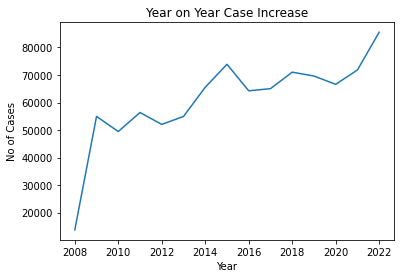

In [117]:
norm_conn = create_connection('311_normalized.db')
sql = """select cast(strftime('%Y',opendate) as integer) as Year,count(opendate) as No_of_cases 
        from casedetails group by year
"""
data = pd.read_sql(sql, norm_conn)
plt.plot(data.Year, data.No_of_cases)
plt.title('Year on Year Case Increase')
plt.xlabel('Year')
plt.ylabel('No of Cases')
plt.show()


### Percentage of total number of Cases created per Department

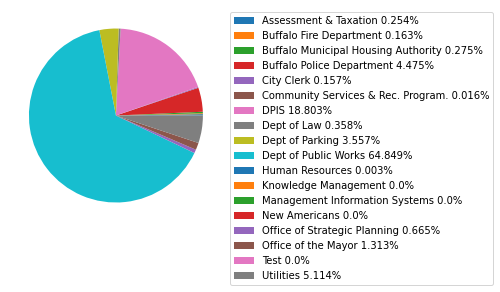

In [118]:
import numpy as np
norm_conn = create_connection('311_normalized.db')
sql = """select department.department as Department,count(opendate) as No_of_cases from casedetails
            join department on department.departmentid = casedetails.departmentid group by department
"""
data = execute_sql_statement(sql, norm_conn)
dep = []
no_of_cases = []
for i in data:
    dep.append(i[0])
    no_of_cases.append(i[1])
    
plt.pie(no_of_cases,rotatelabels = True)
lab = [f'{x} {np.round(y/sum(no_of_cases)*100,3)}%' for x,y in zip(dep,no_of_cases)]
plt.legend(labels=lab,
           bbox_to_anchor=(1,1))
plt.show()

### Plotting Top 20 CaseTypes for Department of Public Works

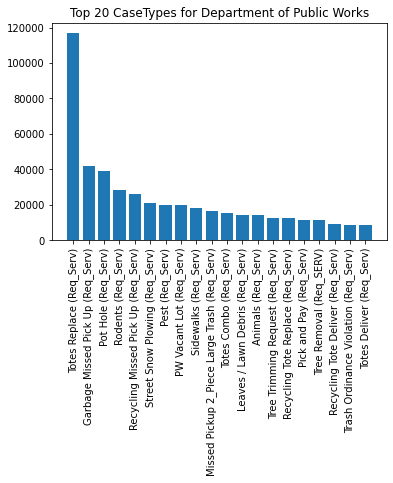

In [119]:
sql = """select department,casetype.type as Casetype,count(casetype.typeid) as Count  from casedetails join department on department.departmentid=casedetails.departmentid
         join casetype on casetype.typeid = casedetails.typeid where department = 'Dept of Public Works' group by department,
         casetype.type order by Count desc limit 20
"""
data = pd.read_sql(sql, norm_conn)
plt.bar(data.Casetype, data.Count)
plt.title("Top 20 CaseTypes for Department of Public Works")
plt.xticks(rotation=90)
plt.show()

#### Plotting No of requests per CaseType category.

In [122]:
df = pd.read_sql_query("""SELECT ct.Type, Count(*) AS RequestCount 
                  FROM CaseDetails c 
                  JOIN CaseType ct 
                  ON ct.TypeID = c.TypeID
                  GROUP BY ct.Type 
                  ORDER BY RequestCount DESC;""", conn)

df.head()

,Type,RequestCount
0,Housing Violations (Req_Serv),149975
1,Totes Replace (Req_Serv),116877
2,Garbage Missed Pick Up (Req_Serv),42008
3,Pot Hole (Req_Serv),39246
4,Police Issue (Req_Serv),28775


In [123]:
fig = px.bar(df[0:20], x = 'RequestCount', y = 'Type',text_auto= '.2s', title = 'Number of Requests By Case Type category', color = 'RequestCount')
fig.update_layout(width = 1200, height = 600, xaxis_tickangle=-45)
fig.show()

#### Plotting No of Requests per Neighborhood Type

In [126]:
df = pd.read_sql_query("""SELECT a.Neighbourhood, Count(*) AS RequestCount 
                  FROM CaseDetails c 
                  JOIN Address a 
                  ON a.AddressID = c.AddressID
                  GROUP BY a.Neighbourhood;""", conn)

df.head()

,neighbourhood,RequestCount
0,Allentown,15598
1,Black Rock,14498
2,Broadway Fillmore,57497
3,Central,15267
4,Central Park,17007


In [127]:
fig = px.bar(df, x= 'neighbourhood', y = 'RequestCount', title= 'Number of Requests per Neighbourhood Type') 
fig.update_layout(width = 1200, height = 600, xaxis_tickangle=-45)
fig.show()

### Plotting No of Requests per Council 

In [128]:

df = pd.read_sql_query("""SELECT a.Council, Count(*) AS RequestCount 
                  FROM CaseDetails c 
                  JOIN Address a 
                  ON a.AddressID = c.AddressID
                  GROUP BY a.Council;""", conn)

df.head()

,council,RequestCount
0,DELAWARE,89662
1,ELLICOTT,93627
2,FILLMORE,129112
3,LOVEJOY,116098
4,MASTEN,116346


In [129]:
fig = px.bar(df, x= 'council', y = 'RequestCount', title= 'Number of Requests per Council') 
fig.update_layout(width = 800, height = 500, xaxis_tickangle=-45)
fig.show()

### Plotting No of Requests raised for Neighbourhood per Council


In [130]:

df = pd.read_sql_query("""SELECT a.Council, a.Neighbourhood, Count(*) AS RequestCount 
                  FROM CaseDetails c 
                  JOIN Address a 
                  ON a.AddressID = c.AddressID
                  GROUP BY a.Council, a.Neighbourhood;""", conn)

df.head()

,council,neighbourhood,RequestCount
0,DELAWARE,Central Park,8201
1,DELAWARE,Elmwood Bidwell,22695
2,DELAWARE,Elmwood Bryant,994
3,DELAWARE,Fillmore-Leroy,32
4,DELAWARE,Hamlin Park,65


In [131]:
fig = px.bar(df, x='RequestCount', y='council', text_auto='.2s',
            title="Number of Requests In Neighbourhood For Each Council",  color='neighbourhood')
fig.update_layout(width = 1200, height = 600, xaxis_tickangle=-45)
fig.show()

### Plotting Avg. ResponseTime taken by each department

In [132]:
 

df = pd.read_sql_query("""SELECT d.Department, AVG(JULIANDAY(c.closedate) - JULIANDAY(c.opendate)) AS AvgResponse 
                FROM CaseDetails c 
                JOIN Department d
                ON d.DepartmentID = c.DepartmentID 
                WHERE c.closedate != 0 
                GROUP BY d.Department 
                HAVING AvgResponse > 0
                ORDER BY AvgResponse DESC;""", conn)

df.head()

,Department,AvgResponse
0,New Americans,262.500000
1,Knowledge Management,164.000000
2,Community Services & Rec. Program.,67.570423
3,City Clerk,41.605845
4,Office of Strategic Planning,28.616725


In [133]:
fig = px.bar(df, x= 'Department', y = 'AvgResponse', title= 'Avg Response Time Taken By Each Department') 
fig.update_layout(width = 800, height = 500, xaxis_tickangle=-45)
fig.show()

### Plotting YoY Trend of Avg Response of Top 5 Highest Departments 

In [134]:


df = pd.read_sql_query("""SELECT strftime('%Y', DATE(opendate)) AS Year, d.Department, AVG(JULIANDAY(c.closedate) - JULIANDAY(c.opendate)) AS AvgResponse 
                FROM CaseDetails c 
                JOIN Department d
                ON d.DepartmentID = c.DepartmentID 
                WHERE c.closedate != 0 
                AND d.DepartmentID IN 
                (SELECT DepartmentID FROM Department
                WHERE Department IN ('New Americans', 'Knowledge Management', 'Community Services & Rec. Program.', 
                'City Clerk', 'Office of Strategic Planning'))
                GROUP BY Year, d.Department 
                HAVING AvgResponse > 0
                ORDER BY Department, Year""", conn)

df.head()

,Year,Department,AvgResponse
0,2008,City Clerk,13.791667
1,2009,City Clerk,16.637681
2,2010,City Clerk,28.458015
3,2011,City Clerk,27.560606
4,2012,City Clerk,2.022472


In [135]:
fig = px.line(df, x = 'Year', y= 'AvgResponse', color= 'Department', title= 'YoY Trend of Avg Response of Top 5 Highest Departments', markers= True) 
fig.update_layout(width = 1200, height = 600, xaxis_tickangle=-45)
fig.show()

### Plotting YoY Trend of Avg request Response time for each Neighbourhoods

In [136]:
# for each neighbourhood 

df = pd.read_sql_query("""SELECT strftime('%Y', DATE(opendate)) AS Year, a.neighbourhood, AVG(JULIANDAY(c.closedate) - JULIANDAY(c.opendate)) AS AvgResponse 
                FROM CaseDetails c 
                JOIN Address a
                ON a.AddressID = c.AddressID 
                WHERE c.closedate != 0 
                GROUP BY Year, a.neighbourhood
                HAVING AvgResponse > 0
                ORDER BY neighbourhood, Year;""", conn)

df.head()

,Year,neighbourhood,AvgResponse
0,2008,Allentown,18.573222
1,2009,Allentown,11.522676
2,2010,Allentown,14.039349
3,2011,Allentown,10.206934
4,2012,Allentown,7.516393


In [137]:
fig = px.line(df, x = 'Year', y= 'AvgResponse', animation_frame= 'neighbourhood', title= 'YoY Trend of Avg request Response time for each Neighbourhoods', markers= True) 
fig.update_layout(width = 1200, height = 600, xaxis_tickangle=-45)
fig.show()

### Plotting YoY Trend of Avg Request Response time for each Council

In [138]:

df = pd.read_sql_query("""SELECT strftime('%Y', DATE(opendate)) AS Year, a.council, AVG(JULIANDAY(c.closedate) - JULIANDAY(c.opendate)) AS AvgResponse 
                FROM CaseDetails c 
                JOIN Address a
                ON a.AddressID = c.AddressID 
                WHERE c.closedate != 0 
                GROUP BY Year, a.council
                HAVING AvgResponse > 0
                ORDER BY council, Year;""", conn)

df.head()


,Year,council,AvgResponse
0,2008,DELAWARE,21.704055
1,2009,DELAWARE,10.954017
2,2010,DELAWARE,17.542010
3,2011,DELAWARE,11.950660
4,2012,DELAWARE,8.950750


In [139]:
fig = px.line(df, x = 'Year', y= 'AvgResponse', color= 'council', title= 'YoY Trend of Avg Request Response time for each Council', markers= True) 
fig.update_layout(width = 1200, height = 600, xaxis_tickangle=-45)
fig.show()